In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import json
from wordcloud import WordCloud
import collections

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize.regexp import RegexpTokenizer
  
%matplotlib inline

In [2]:
dataset = pd.read_csv('./data/nlp_finalproj_data_withids.csv')

In [3]:
dataset.shape

(3590, 11)

In [4]:
dataset = dataset.iloc[:,0:11]

In [5]:
dataset.head()

,r_id,cuisine,title,ingredients,ingred_id,process,instructions,keto,healthScore,diets,nutritions
0,573147,Chinese,Kale Fried Rice,"['cooked brown rice', 'garlic', 'kale', 'scall...","[20041, 11215, 11233, 11291, 16124, 4513]","[['cooked'], ['finely minced', 'peeled'], ['th...",Cut the kale leaves in half lengthwise and the...,False,97,"['gluten free', 'dairy free', 'lacto ovo veget...","{'percentProtein': 11.92, 'percentFat': 23.52,..."
1,474222,Chinese,Burmese Fried Rice with Green Peas and Shallots,"['cooked brown rice', 'fish sauce', 'fresh cil...","[20041, 6179, 11165, 6168, 1029159, 4053, 1130...","[['cold', 'cooked'], ['gluten-free'], ['fresh'...",Heat wok over medium high heat. Add oil; then ...,False,47,"['gluten free', 'dairy free', 'pescatarian']","{'percentProtein': 8.96, 'percentFat': 21.33, ..."
2,613045,Chinese,Chinese Beef & Broccoli Stir-Fry {Skinnytaste ...,"['broccoli florets', 'cornstarch', 'dark brown...","[10011090, 20027, 10019334, 11216, 11215, 1082...","[[], [], ['dark', 'packed'], ['fresh', 'minced...","In a shallow glass container, whisk together t...",False,55,"['gluten free', 'dairy free']","{'percentProtein': 43.02, 'percentFat': 33.48,..."
3,245209,Chinese,Easy Chinese Chicken Salad with Chow Mein Noodles,"['skinless boneless chicken breast', 'salt', '...","[1055062, 2047, 1004058, 4042, 1032009, 11119,...","[['boneless', 'skinless', 'sliced into short s...",Sauté the chicken: Heat both oils over high he...,False,58,['dairy free'],"{'percentProtein': 25.48, 'percentFat': 55.45,..."
4,507985,Chinese,Chinese Beef and Broccoli,"['broccoli', 'cornstarch', 'cornstarch', 'dark...","[11090, 20027, 20027, 10019334, 23657, 11216, ...","[['for another use)', 'cut into florets (disca...","1. In a small bowl, whisk together all of the ...",False,53,"['gluten free', 'dairy free']","{'percentProtein': 41.62, 'percentFat': 31.49,..."


In [6]:
# check any ducplicated r_id
unique_rid = set(dataset['r_id'])
len(unique_rid)

# remove ducplicated r_id
dataset.drop_duplicates(subset = ['r_id'],keep = 'first',inplace = True)

In [7]:
dataset.shape

(3410, 11)

In [8]:
# 3567 

In [9]:
instruction = dataset.loc[3,'instructions']

In [10]:
tokenizer =  RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(instruction.lower())

In [11]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/yuranpan/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
#print(nltk.pos_tag(tokens))

In [13]:
dataset.loc[3,'ingredients']

"['skinless boneless chicken breast', 'salt', 'dark sesame oil', 'peanut oil', 'red pepper flakes', 'napa cabbage', 'bell pepper', 'scallions', 'carrot', 'cilantro leaves', 'roasted peanuts', 'chow mein noodles', 'soy sauce', 'unseasoned rice vinegar', 'mustard powder', 'fresh ginger', 'garlic', 'chili flakes', 'sugar', 'canola oil']"

In [14]:
african = dataset[dataset['cuisine']=='African']
chinese = dataset[dataset['cuisine']=='Chinese']
french = dataset[dataset['cuisine']=='French']
indian = dataset[dataset['cuisine']=='Indian']
italian = dataset[dataset['cuisine']=='Italian']
mediterranean = dataset[dataset['cuisine']=='Mediterranean']
mid_eastern = dataset[dataset['cuisine']=='Middle Eastern']
vietnamese = dataset[dataset['cuisine']=='Vietnamese']
american = dataset[dataset['cuisine']=='American']
thai = dataset[dataset['cuisine']=='Thai']

### healthScore

In [15]:
dataset.groupby('cuisine').describe()['healthScore'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
Middle Eastern,250.0,36.984000,25.928689,5.0,17.00,30.0,49.00,100.0
African,123.0,29.813008,26.648086,0.0,11.00,22.0,40.50,100.0
Mexican,250.0,28.016000,21.854019,3.0,12.00,21.0,37.00,100.0
Thai,250.0,27.792000,23.441389,2.0,12.00,20.0,33.75,100.0
Japanese,249.0,24.899598,23.100106,0.0,7.00,19.0,34.00,100.0
Indian,211.0,23.369668,21.759198,0.0,8.00,17.0,32.50,100.0
Italian,242.0,23.148760,23.329557,1.0,7.00,15.0,28.75,100.0
Caribbean,250.0,23.028000,22.391622,0.0,6.00,15.0,32.75,100.0
Vietnamese,250.0,23.028000,18.460726,1.0,9.25,19.0,33.00,100.0


On average, Middle Eastern has heathlest score while chinese has the lowest

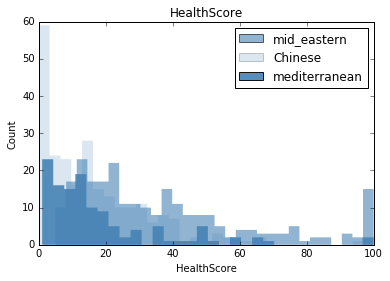

In [16]:
plt.hist(mid_eastern['healthScore'],bins = 30, edgecolor = 'none',histtype='stepfilled',color='steelblue',alpha = 0.6,label = 'mid_eastern')

plt.hist(chinese['healthScore'],bins = 30, edgecolor = 'none',histtype='stepfilled',color='steelblue',alpha = 0.2,label = 'Chinese')

plt.hist(mediterranean['healthScore'],bins = 30, edgecolor = 'none',histtype='stepfilled',color='steelblue',alpha = 0.9,label = 'mediterranean')
plt.title('HealthScore')
plt.xlabel('HealthScore')
plt.ylabel('Count')
plt.legend()
plt.show()

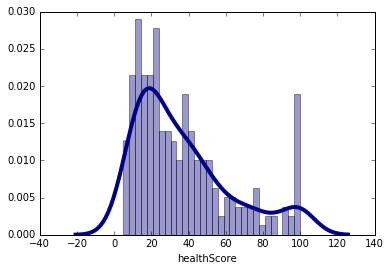

In [17]:

sns.distplot(mid_eastern['healthScore'], hist=True,  
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## WordCloud

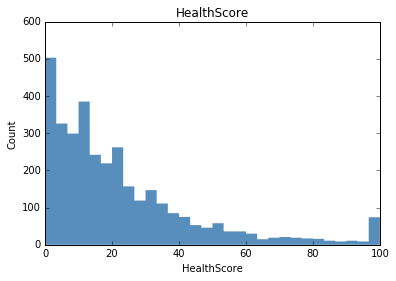

In [18]:
plt.hist(dataset['healthScore'],bins = 30, edgecolor = 'none',histtype='stepfilled',color='steelblue',alpha = 0.9)
plt.title('HealthScore')
plt.xlabel('HealthScore')
plt.ylabel('Count')
plt.show()

### most common ingredients for each cuisine


In [19]:
def preprocess_ingredients(cuisine, stopwords = False):
    
    # convert from string to list
    ingredients_lst = cuisine['ingredients'].apply(lambda y:[x.strip() for x in y.replace("'", "").replace('[', '').replace(']', '').strip().split(',')])
    
    
    # get total tokens for a specific cuisine
    total_tokens = [ingred for ingreds in ingredients_lst for ingred in ingreds]
    
    # remove stopwords based on common ingredients 
    if stopwords == True:
        stop_words = ['salt','water','garlic','olive oil','vegetable oil','sugar','garlic cloves','kosher salt'] # add more if needed
        total_tokens = [x for x in total_tokens if not x in stop_words]
    
    
    # get vocab for a specific cuisine
    vocab = set(total_tokens)
    
    return ingredients_lst,total_tokens,vocab
    

def get_top_tokens(total_tokens,top_n):
    
    counter = collections.Counter(total_tokens)
    tokens_top = counter.most_common()[0:top_n]
    
    return tokens_top


def get_wordcloud(total_tokens,top_n):
    """
    arg: a list of tuples indicating token and its count
    show the word in wordcloud, frequency is represented by the size of the words
    """
    
    counter = collections.Counter(total_tokens)
    tokens_top = counter.most_common()[0:top_n]
    wordcloud = WordCloud(background_color ='white')
    wordcloud.generate_from_frequencies(dict(tokens_top))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordcloud.png')
    plt.show()

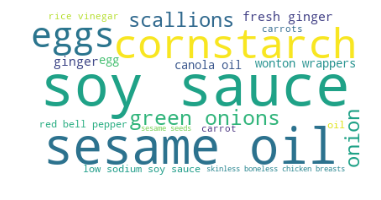

In [20]:
get_wordcloud(preprocess_ingredients(chinese,True)[1],20)

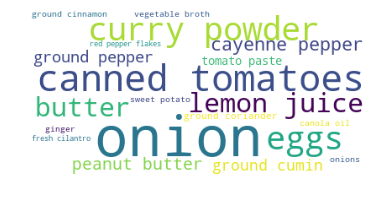

In [39]:
get_wordcloud(preprocess_ingredients(african,True)[1],20)

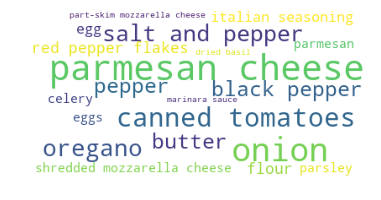

In [43]:
get_wordcloud(preprocess_ingredients(italian,True)[1],20)

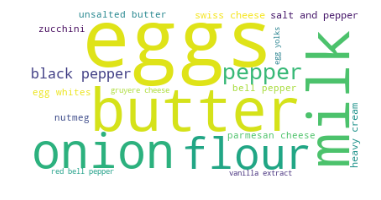

In [132]:
get_wordcloud(preprocess_ingredients(french,True)[1],20)

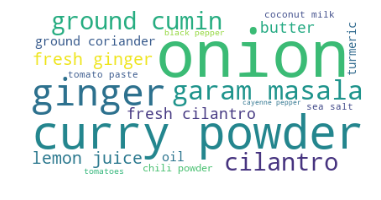

In [44]:
get_wordcloud(preprocess_ingredients(indian,True)[1],20)

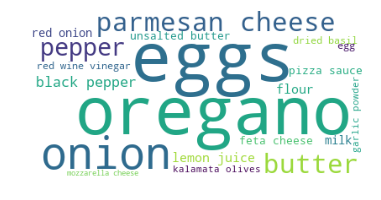

In [47]:
get_wordcloud(preprocess_ingredients(mediterranean,True)[1],20)

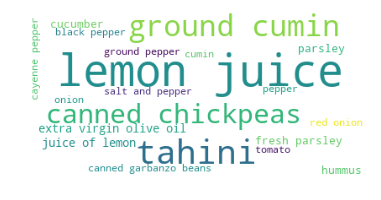

In [48]:
get_wordcloud(preprocess_ingredients(mid_eastern,True)[1],20)

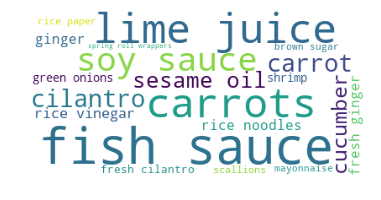

In [49]:
get_wordcloud(preprocess_ingredients(vietnamese,True)[1],20)

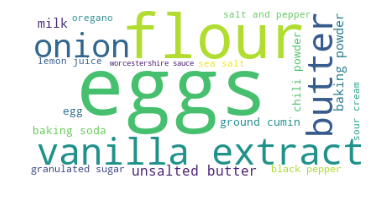

In [46]:
get_wordcloud(preprocess_ingredients(american,True)[1],20)

### common ingredients across cuisines

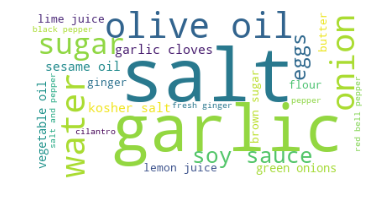

In [50]:
get_wordcloud(preprocess_ingredients(dataset)[1],25)

below is an example of commonly used ingredients between mediterranean and italian

In [21]:
def intersection(lst1, lst2):
    """
    give two lists of tokens, return common words
    """
    return set([x[0] for x in lst1]).intersection(set([x[0] for x in lst2]))

In [129]:
lst1 = get_top_tokens(preprocess_ingredients(thai,True)[1],10)
lst2 = get_top_tokens(preprocess_ingredients(american,True)[1],10)

In [130]:
len(intersection(lst1,lst2))

0

In [131]:
lst1

[('fish sauce', 105),
 ('soy sauce', 80),
 ('lime juice', 76),
 ('red bell pepper', 57),
 ('cilantro', 57),
 ('green onions', 50),
 ('sesame oil', 48),
 ('brown sugar', 45),
 ('fresh cilantro', 42),
 ('fresh ginger', 41)]

In [ ]:
lst2

# RNN to create recipy instruction